In [556]:
import pandas as pd

In [557]:
B_Y =  pd.read_csv('btp.csv')
B_Y.head()

,gamma,beta
0,0.0,0.000000e+00
1,0.0,0.000000e+00
2,0.0,-3.700000e-10
3,0.0,-2.460000e-10
4,0.0,0.000000e+00


In [559]:
data = B_Y[:145]
data.head()

,gamma,beta
0,0.0,0.000000e+00
1,0.0,0.000000e+00
2,0.0,-3.700000e-10
3,0.0,-2.460000e-10
4,0.0,0.000000e+00


In [560]:
data.describe()

,gamma,beta
count,145.000000,1.450000e+02
mean,0.039232,-8.277172e-11
std,0.092451,8.873993e-11
min,0.000000,-7.390000e-10
25%,0.009091,-8.780000e-11
50%,0.030053,-6.710000e-11
75%,0.044900,-5.740000e-11
max,1.000000,0.000000e+00


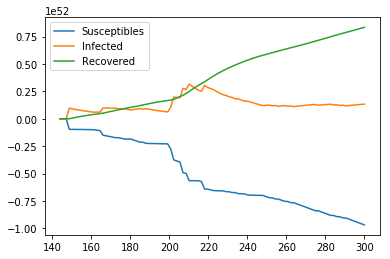

In [565]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 30 00:07:09 2020

@author: Samiksha
"""

"""
SIR disease model

S' = -beta*S*I
I' = beta*S*I - nu*I
R' = nu*I
"""

import numpy as np
from ODESolver import ForwardEuler
from matplotlib import pyplot as plt

def multiply(num1, num2): 
    len1 = len(num1) 
    len2 = len(num2) 
    if len1 == 0 or len2 == 0: 
        return "0"
  
    # will keep the result number in vector 
    # in reverse order 
    result = [0] * (len1 + len2) 
      
    # Below two indexes are used to  
    # find positions in result. 
    i_n1 = 0
    i_n2 = 0
  
    # Go from right to left in num1 
    for i in range(len1 - 1, -1, -1): 
        carry = 0
        n1 = ord(num1[i]) - 48
  
        # To shift position to left after every 
        # multiplication of a digit in num2 
        i_n2 = 0
  
        # Go from right to left in num2 
        for j in range(len2 - 1, -1, -1): 
              
            # Take current digit of second number 
            n2 = ord(num2[j]) - 48
          
            # Multiply with current digit of first number 
            # and add result to previously stored result 
            # at current position. 
            summ = n1 * n2 + result[i_n1 + i_n2] + carry 
  
            # Carry for next iteration 
            carry = summ // 10
  
            # Store result 
            result[i_n1 + i_n2] = summ % 10
  
            i_n2 += 1
  
            # store carry in next cell 
        if (carry > 0): 
            result[i_n1 + i_n2] += carry 
  
            # To shift position to left after every 
            # multiplication of a digit in num1. 
        i_n1 += 1
          
        # print(result) 
  
    # ignore '0's from the right 
    i = len(result) - 1
    while (i >= 0 and result[i] == 0): 
        i -= 1
  
    # If all were '0's - means either both or 
    # one of num1 or num2 were '0' 
    if (i == -1): 
        return "0"
  
    # generate the result string 
    s = "" 
    while (i >= 0): 
        s += chr(result[i] + 48) 
        i -= 1
  
    return s

class SIR:
    def __init__(self, nu, beta, initial_sus, initial_inf, initial_rec):
        """
        nu, beta: parameters in the ODE system
        initial_sus, initial_inf, intital_rec: initial values
        """
        
        if isinstance(nu, (float, int)):
            # Is number?
            self.nu = lambda t: nu
        elif callable(nu):
            self.nu = nu
            
        if isinstance(beta, (float, int)):
            # Is number?
            self.beta = lambda t: beta
        elif callable(beta):
            self.beta = beta
            
        self.initial_conditions = [initial_sus, initial_inf, initial_rec]
        
    def __call__(self, u, t):

        
        S, I, _ = u
        
        return np.asarray([
                -int(multiply(str(self.beta(t)),multiply(str(S),str(I)))), # Susceptibles
                int(multiply(str(self.beta(t)),multiply(str(S),str(I)))) - self.nu(t)*I, # Infected
                self.nu(t)*I # Recovered
        ])
    
if __name__ == "__main__":
    
    #beta = lambda t: 0.0005 if t <=10 else 0.0001
    
    sir = SIR(0.04,0.000000000083,1380051913-648315, 235433, 394227+18655)
    solver = ForwardEuler(sir)
    solver.set_initial_conditions(sir.initial_conditions)
    

    time_steps = np.linspace(144,300,100)
    u, t = solver.solve(time_steps)
    
    plt.plot(t, u[:, 0], label="Susceptibles")
    plt.plot(t, u[:, 1], label="Infected")
    plt.plot(t, u[:, 2], label="Recovered")
    plt.legend()
    plt.show()
    

In [566]:
a = []
for i in range(1,146):
  a.append(i)

data['Days_passed'] = a

/home/sushanth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [675]:
data1 = data[115:145]
data

,gamma,beta,Days_passed
0,0.000000,0.000000e+00,1
1,0.000000,0.000000e+00,2
2,0.000000,-3.700000e-10,3
3,0.000000,-2.460000e-10,4
4,0.000000,0.000000e+00,5
5,0.000000,0.000000e+00,6
6,0.000000,0.000000e+00,7
7,0.000000,0.000000e+00,8
8,0.000000,0.000000e+00,9
9,0.000000,0.000000e+00,10


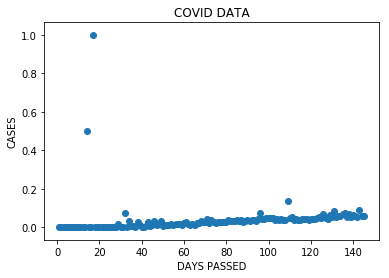

In [676]:
#this data has some noice so removed extremevalues
import numpy as np
import matplotlib.pyplot as plt

# Plot
plt.scatter(data.Days_passed,data.gamma)
plt.title('COVID DATA')
plt.xlabel("DAYS PASSED")
plt.ylabel('CASES')
plt.show()

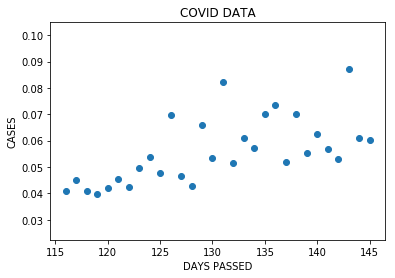

In [568]:
import numpy as np
import matplotlib.pyplot as plt

# Plot
plt.scatter(data1.Days_passed,data1.gamma)
plt.title('COVID DATA')
plt.xlabel("DAYS PASSED")
plt.ylabel('CASES')
plt.show()

In [647]:
#splitting the data into train and test.

X = np.array(data1.Days_passed).reshape(-1, 1) 
y = np.array(data1.gamma).reshape(-1, 1) 
 
from sklearn.model_selection import train_test_split     
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1) 
  
#Applying Regression model
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.9545038439327108


In [648]:
#decision tree regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)
print(dtr.score(X_test,y_test))

0.5997428482456446


In [649]:
print(regr.predict([[145]]))


[[0.0691221]]


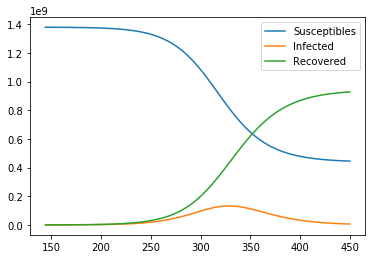

In [677]:
#N = 1380051913
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 30 00:07:09 2020

@author: Samiksha
"""

"""
SIR disease model

S' = -beta*S*I
I' = beta*S*I - nu*I
R' = nu*I
"""

import numpy as np
from ODESolver import ForwardEuler
from matplotlib import pyplot as plt

def multiply(num1, num2): 
    len1 = len(num1) 
    len2 = len(num2) 
    if len1 == 0 or len2 == 0: 
        return "0"
  
    # will keep the result number in vector 
    # in reverse order 
    result = [0] * (len1 + len2) 
      
    # Below two indexes are used to  
    # find positions in result. 
    i_n1 = 0
    i_n2 = 0
  
    # Go from right to left in num1 
    for i in range(len1 - 1, -1, -1): 
        carry = 0
        n1 = ord(num1[i]) - 48
  
        # To shift position to left after every 
        # multiplication of a digit in num2 
        i_n2 = 0
  
        # Go from right to left in num2 
        for j in range(len2 - 1, -1, -1): 
              
            # Take current digit of second number 
            n2 = ord(num2[j]) - 48
          
            # Multiply with current digit of first number 
            # and add result to previously stored result 
            # at current position. 
            summ = n1 * n2 + result[i_n1 + i_n2] + carry 
  
            # Carry for next iteration 
            carry = summ // 10
  
            # Store result 
            result[i_n1 + i_n2] = summ % 10
  
            i_n2 += 1
  
            # store carry in next cell 
        if (carry > 0): 
            result[i_n1 + i_n2] += carry 
  
            # To shift position to left after every 
            # multiplication of a digit in num1. 
        i_n1 += 1
          
        # print(result) 
  
    # ignore '0's from the right 
    i = len(result) - 1
    while (i >= 0 and result[i] == 0): 
        i -= 1
  
    # If all were '0's - means either both or 
    # one of num1 or num2 were '0' 
    if (i == -1): 
        return "0"
  
    # generate the result string 
    s = "" 
    while (i >= 0): 
        s += chr(result[i] + 48) 
        i -= 1
  
    return s

class SIR:
    def __init__(self, nu, beta, initial_sus, initial_inf, initial_rec):
        """
        nu, beta: parameters in the ODE system
        initial_sus, initial_inf, intital_rec: initial values
        """
        
        if isinstance(nu, (float, int)):
            # Is number?
            self.nu = lambda t: nu
        elif callable(nu):
            self.nu = nu
            
        if isinstance(beta, (float, int)):
            # Is number?
            self.beta = lambda t: beta
        elif callable(beta):
            self.beta = beta
            
        self.initial_conditions = [initial_sus, initial_inf, initial_rec]
        
    def __call__(self, u, t):

        
        S, I, _ = u
        
        return np.asarray([
               -self.beta(t)*S*I,
                self.beta(t)*S*I - self.nu(t)*I,
                self.nu(t)*I
        ])
    
if __name__ == "__main__":
    
   # beta = lambda t: 0.000000000053 if t <=144 else 0.000000000093

    
    sir = SIR(0.069,0.000000000083,1380051913-648315, 235433, 394227+18655)
    solver = ForwardEuler(sir)
    solver.set_initial_conditions(sir.initial_conditions)
    

    time_steps = np.linspace(144,450,90)
    u, t = solver.solve(time_steps)
    
  
    plt.plot(t, u[:, 0], label="Susceptibles")
    plt.plot(t, u[:, 1], label="Infected")
    plt.plot(t, u[:, 2], label="Recovered")
    plt.legend()
    plt.show()
    

In [ ]:
#rough
sir = SIR(0.07,beta,1380051913-648315, 235433, 394227+18655)
    solver = ForwardEuler(sir)
    solver.set_initial_conditions(sir.initial_conditions)
    

    time_steps = np.linspace(144,300,100)
    u, t = solver.solve(time_steps)

In [555]:
0.000000000083

8.3e-11

In [ ]:
  sir = SIR(0.06,beta,1380051913, 1, 0)
    solver = ForwardEuler(sir)
    solver.set_initial_conditions(sir.initial_conditions)
    

    time_steps = np.linspace(0,500,100)
    u, t = solver.solve(time_steps)
    